## Coding


In [1]:
!pip install -U transformers
!pip install -U accelerate
!pip install -U datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 25.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.2
    Uninstalling transformers-4.41.2:
      Successfully uninstalled transformers-4.41.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.1/314.1 kB 2.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none

In [2]:
from datasets import Dataset, DatasetDict


In [3]:
import pandas as pd
train_df=pd.read_csv('/content/new_final_train_data_with_null.csv')
val_df=pd.read_csv('/content/valid.csv')
test_df=pd.read_csv('/content/new_final_test_data_with_null.csv')
train_lst=[]
train_lst1=[]
val_lst=[]
val_lst1=[]
test_lst=[]
test_lst1=[]
for i in train_df['Sentences']:
  train_lst.append(i.split())
for i in train_df['Labels']:
  train_lst1.append(eval(i))
for i in val_df['Sentences']:
  val_lst.append(i.split())
for i in val_df['Labels']:
  val_lst1.append(list(i))
for i in test_df['Sentences']:
  test_lst.append(i.split())
for i in test_df['Labels']:
  test_lst1.append(eval(i))
for i in range(len(train_lst1)):
  for j in range(len(train_lst1[i])):
    if train_lst1[i][j]=='B':
      train_lst1[i][j]=0
    if train_lst1[i][j]=='I':
      train_lst1[i][j]=1
    if train_lst1[i][j]=='O':
      train_lst1[i][j]=2
for i in range(len(val_lst1)):
  for j in range(len(val_lst1[i])):
    if val_lst1[i][j]=='B':
      val_lst1[i][j]=0
    if val_lst1[i][j]=='I':
      val_lst1[i][j]=1
    if val_lst1[i][j]=='O':
      val_lst1[i][j]=2
for i in range(len(test_lst1)):
  for j in range(len(test_lst1[i])):
    if test_lst1[i][j]=='B':
      test_lst1[i][j]=0
    if test_lst1[i][j]=='I':
      test_lst1[i][j]=1
    if test_lst1[i][j]=='O':
      test_lst1[i][j]=2
train_df['Sentences']=train_lst
train_df['Labels']=train_lst1
val_df['Sentences']=val_lst
val_df['Labels']=val_lst1
test_df['Sentences']=test_lst
test_df['Labels']=test_lst1


dataset1 = Dataset.from_pandas(train_df)
dataset2 = Dataset.from_pandas(val_df)
dataset3 = Dataset.from_pandas(test_df)

# Create a dictionary with split names as keys and Dataset objects as values
splits = {'train': dataset1, 'validation': dataset2, 'test': dataset3}

# Create a DatasetDict
dataa= DatasetDict(splits)

# Print the information about the created DatasetDict
print(dataa)


DatasetDict({
    train: Dataset({
        features: ['Sentences', 'aspect terms', 'Labels'],
        num_rows: 5056
    })
    validation: Dataset({
        features: ['Sentences', 'Labels'],
        num_rows: 847
    })
    test: Dataset({
        features: ['Sentences', 'aspect terms', 'Labels'],
        num_rows: 1265
    })
})


In [4]:
data = DatasetDict({
    "train": dataa["train"].remove_columns("aspect terms"),
    "test": dataa["test"].remove_columns("aspect terms")
})

## Model Building

### Tokenization

In [5]:
# Tokenizer and model loading
from transformers import T5TokenizerFast, T5ForConditionalGeneration

model_checkpoint = "google/flan-t5-large"
tokenizer = T5TokenizerFast.from_pretrained(model_checkpoint)
model = T5ForConditionalGeneration.from_pretrained(model_checkpoint)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

In [6]:
pip install peft

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 1.9 MB/s eta 0:00:00


In [7]:
import torch
torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_flash_sdp(False)

In [8]:
pip install evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 929.2 kB/s eta 0:00:00


In [9]:
pip install seqeval

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 761.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16161 sha256=abb56b7b577ba14d2c5e11b215a904ae0e1fae767990dafc95a28c1babb26001
  Stored in directory: /root/.cache/pip/wheels/1a/67/4a/ad4082dd7dfc30f2abfe4d80a2ed5926a506eb8a972b4767fa
Successfully built seqeval


In [14]:
tokenizer.is_fast

True

In [ ]:
inputs = data['train'][75]['Sentences']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.tokens())


['▁the', '▁antique', '▁shops', '▁are', '▁great', '▁to', '▁browse', '</s>']


In [ ]:
# inputs.word_ids()
inputs = data['train'][75]['Sentences']
inputs = tokenizer(inputs, is_split_into_words=True)
print(inputs.word_ids)


<bound method BatchEncoding.word_ids of {'input_ids': [8, 11304, 5391, 33, 248, 12, 9708, 1], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1]}>


In [12]:
# def align_labels_with_tokens(labels, word_ids):
#   new_labels = []
#   current_word=None
#   for word_id in word_ids:
#     if word_id != current_word:
#       current_word = word_id
#       label = -100 if word_id is None else labels[word_id]
#       new_labels.append(label)

#     elif word_id is None:
#       new_labels.append(-100)

#     else:
#       label = labels[word_id]

#       if label%2==1:
#         label = label + 1
#       new_labels.append(label)

#   return new_labels


# Tokenization and label alignment
def align_labels_with_tokens(labels, word_ids):
    new_labels = []
    current_word = None
    for word_id in word_ids:
        if word_id != current_word:
            current_word = word_id
            label = -100 if word_id is None else labels[word_id]
            new_labels.append(label)
        elif word_id is None:
            new_labels.append(-100)
        else:
            label = labels[word_id]
            if label % 2 == 1:
                label = label + 1
            new_labels.append(label)
    return new_labels

In [13]:
def tokenize_and_align_labels(examples):
    tokenized_inputs = tokenizer(examples['Sentences'], truncation=True, is_split_into_words=True)
    all_labels = examples['Labels']
    new_labels = []
    for i, labels in enumerate(all_labels):
        word_ids = tokenized_inputs.word_ids(i)
        new_labels.append(align_labels_with_tokens(labels, word_ids))
    tokenized_inputs['labels'] = new_labels
    return tokenized_inputs


In [14]:
tokenized_datasets = data.map(tokenize_and_align_labels, batched=True, remove_columns=data['train'].column_names)

Map:   0%|          | 0/5056 [00:00<?, ? examples/s]

Map:   0%|          | 0/1265 [00:00<?, ? examples/s]

In [15]:
tokenized_datasets

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 5056
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'labels'],
        num_rows: 1265
    })
})

### Data Collation and Metrics

In [16]:
from transformers import DataCollatorForTokenClassification

data_collator = DataCollatorForTokenClassification(tokenizer=tokenizer)

In [20]:
batch = data_collator([tokenized_datasets['train'][i] for i in range(2)])
batch

{'input_ids': tensor([[   79,   128,   310,  1477, 14432,    84,    33,  1728,    59,   435,
            16,   119,  9307,    16, 18222,     1],
        [   25,    43,    12,   240,     3,     9,  4142,    12,   281,    21,
             8,   903,   500,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0]]), 'labels': tensor([[   2,    2,    2,    2,    0,    2,    2,    2,    2,    2,    2,    2,
            2,    2,    2, -100],
        [   2,    2,    2,    2,    2,    2,    0,    2,    2,    2,    2,    2,
            2, -100, -100, -100]])}

### Metrics

In [20]:
!pip install seqeval
!pip install evaluate

import evaluate
metric = evaluate.load('seqeval')

In [17]:
label_names = ['B','I','O']
label_names

['B', 'I', 'O']

In [18]:
labels = data['train'][0]['Labels']
labels = [label_names[i] for i in labels]
labels

['O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

In [21]:
predictions = labels.copy()
print(predictions)
predictions[2] = "O"

metric.compute(predictions=[predictions], references=[labels])

['O', 'O', 'O', 'O', 'B', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


{'_': {'precision': 1.0, 'recall': 1.0, 'f1': 1.0, 'number': 1},
 'overall_precision': 1.0,
 'overall_recall': 1.0,
 'overall_f1': 1.0,
 'overall_accuracy': 1.0}

In [22]:
y_pred=[]
y_true=[]

In [23]:
# import numpy as np
# from sklearn.metrics import classification_report, accuracy_score

# def compute_metrics(eval_preds):
#   global y_pred, y_true
#   logits, labels = eval_preds

#   predictions = np.argmax(logits, axis=-1)

#   true_labels = [[label_names[l] for l in label if l!=-100] for label in labels]

#   true_predictions = [[label_names[p] for p,l in zip(prediction, label) if l!=-100]
#                       for prediction, label in zip(predictions, labels)]
#   y_pred=true_predictions
#   y_true=true_labels
#   all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
#   y_true_flat = [label for sublist in y_true for label in sublist]
#   y_pred_flat = [label for sublist in y_pred for label in sublist]

#   accuracy = accuracy_score(y_true_flat, y_pred_flat)

#   report = classification_report(y_true_flat, y_pred_flat)
#   print(report)
#   return {"precision": all_metrics['overall_precision'],
#           "recall": all_metrics['overall_recall'],
#           "f1": all_metrics['overall_f1'],
#           "accuracy": all_metrics['overall_accuracy']}

# Compute metrics function
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

def compute_metrics(eval_preds):
    global y_pred, y_true
    logits, labels = eval_preds
    predictions = np.argmax(logits, axis=-1)
    true_labels = [[label_names[l] for l in label if l != -100] for label in labels]
    true_predictions = [[label_names[p] for p, l in zip(prediction, label) if l != -100] for prediction, label in zip(predictions, labels)]
    y_pred = true_predictions
    y_true = true_labels
    all_metrics = metric.compute(predictions=true_predictions, references=true_labels)
    y_true_flat = [label for sublist in y_true for label in sublist]
    y_pred_flat = [label for sublist in y_pred for label in sublist]
    accuracy = accuracy_score(y_true_flat, y_pred_flat)
    report = classification_report(y_true_flat, y_pred_flat)
    print(report)
    return {"precision": all_metrics['overall_precision'],
            "recall": all_metrics['overall_recall'],
            "f1": all_metrics['overall_f1'],
            "accuracy": all_metrics['overall_accuracy']}

### Model Training

In [40]:
id2label = {i:label for i, label in enumerate(label_names)}
label2id = {label:i for i, label in enumerate(label_names)}

In [41]:
print(id2label)

{0: 'B', 1: 'I', 2: 'O'}


In [ ]:
from transformers import AutoModelForTokenClassification

model = AutoModelForTokenClassification.from_pretrained(
                                                    model_checkpoint,
                                                    id2label=id2label,
                                                    label2id=label2id)

Some weights of T5ForTokenClassification were not initialized from the model checkpoint at google/flan-t5-large and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [24]:
model.config.num_labels

2

In [25]:
# from transformers import TrainingArguments

# args = TrainingArguments("bert-finetuned-ner",
#                          evaluation_strategy = "epoch",
#                          save_strategy="epoch",
#                          learning_rate = 2.7e-5,
#                          num_train_epochs=10,
#                          weight_decay=0.01)

# Training arguments and trainer with early stopping
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback

args = TrainingArguments(
    output_dir="/content/flant5finetune",
    learning_rate=2e-4,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    greater_is_better=True,
    save_strategy="epoch",
    metric_for_best_model="eval_f1",
    load_best_model_at_end=True


)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [26]:
# from transformers import Trainer
# trainer = Trainer(model=model,
#                   args=args,
#                   train_dataset = tokenized_datasets['train'],
#                   eval_dataset = tokenized_datasets['test'],
#                   data_collator=data_collator,
#                   compute_metrics=compute_metrics,
#                   tokenizer=tokenizer)

# trainer.train()

trainer = Trainer(
    model=model,
    args=args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=5)]  # Early stopping callback
)

# Train the model
trainer.train()

Epoch,Training Loss,Validation Loss


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 3 dimensions. The detected shape was (2, 1265, 106) + inhomogeneous part.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score
y_true_flat = [label for sublist in y_true for label in sublist]
y_pred_flat = [label for sublist in y_pred for label in sublist]

accuracy = accuracy_score(y_true_flat, y_pred_flat)

report = classification_report(y_true_flat, y_pred_flat)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.8985847925161909
Classification Report:
              precision    recall  f1-score   support

           B       0.60      0.56      0.58      2104
           I       0.60      0.40      0.48       561
           O       0.94      0.95      0.94     18180

    accuracy                           0.90     20845
   macro avg       0.71      0.64      0.67     20845
weighted avg       0.89      0.90      0.90     20845



In [ ]:
print(trainer.state.log_history)

[{'eval_loss': 0.2676889896392822, 'eval_precision': 0.610738255033557, 'eval_recall': 0.3432343234323432, 'eval_f1': 0.4394808330817989, 'eval_accuracy': 0.899736147757256, 'eval_runtime': 3.6399, 'eval_samples_per_second': 347.533, 'eval_steps_per_second': 21.978, 'epoch': 1.0, 'step': 316}, {'loss': 0.3113, 'grad_norm': 1.6510826349258423, 'learning_rate': 0.00016835443037974685, 'epoch': 1.5822784810126582, 'step': 500}, {'eval_loss': 0.2627990245819092, 'eval_precision': 0.5783204288266826, 'eval_recall': 0.4578029231494578, 'eval_f1': 0.5110526315789474, 'eval_accuracy': 0.9021348045094747, 'eval_runtime': 3.6158, 'eval_samples_per_second': 349.855, 'eval_steps_per_second': 22.125, 'epoch': 2.0, 'step': 632}, {'eval_loss': 0.3020975887775421, 'eval_precision': 0.5384250474383302, 'eval_recall': 0.5351249410655351, 'eval_f1': 0.5367699219673682, 'eval_accuracy': 0.8964739745742384, 'eval_runtime': 3.6968, 'eval_samples_per_second': 342.19, 'eval_steps_per_second': 21.64, 'epoch': 

In [ ]:
log_history = trainer.state.log_history

# Convert log history to DataFrame
df_log = pd.DataFrame(log_history)

# Filter for training and evaluation losses
df_train_loss = df_log[df_log['loss'].notna()][['epoch', 'loss']]
df_eval_loss = df_log[df_log['eval_loss'].notna()][['epoch', 'eval_loss']]

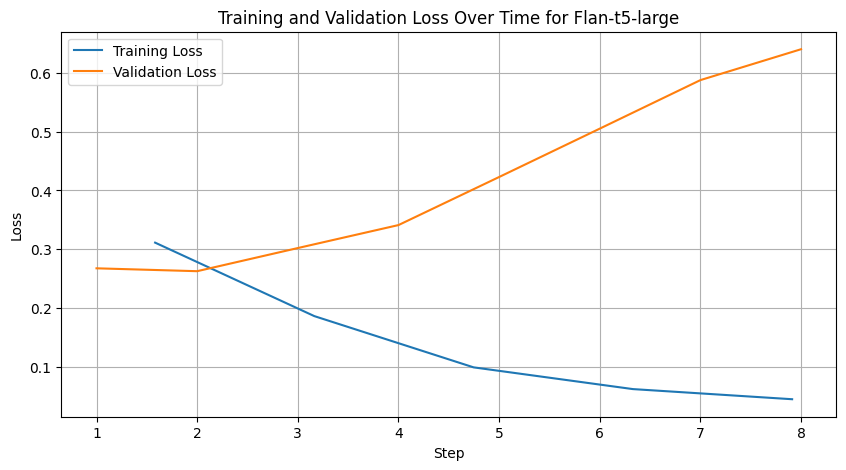

In [ ]:
# Plot training and evaluation loss
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(df_train_loss['epoch'], df_train_loss['loss'], label='Training Loss')
plt.plot(df_eval_loss['epoch'], df_eval_loss['eval_loss'], label='Validation Loss')
plt.xlabel('Step')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Time for Flan-t5-large')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
loss_values = []
eval_loss_values = []

for i, item in enumerate(trainer.state.log_history):
    if 'eval_loss' in item:
        # Check if there's a loss value before this eval_loss
        if i > 0 and 'loss' in trainer.state.log_history[i - 1]:
            loss_values.append(trainer.state.log_history[i - 1]['loss'])
            eval_loss_values.append(item['eval_loss'])

# Now both lists have the same size
print(len(loss_values), len(eval_loss_values))

5 5


In [ ]:
print(loss_values)
print(eval_loss_values)

[0.3113, 0.1865, 0.0995, 0.0626, 0.0454]
[0.2627990245819092, 0.34109362959861755, 0.42270854115486145, 0.5872710347175598, 0.639718770980835]


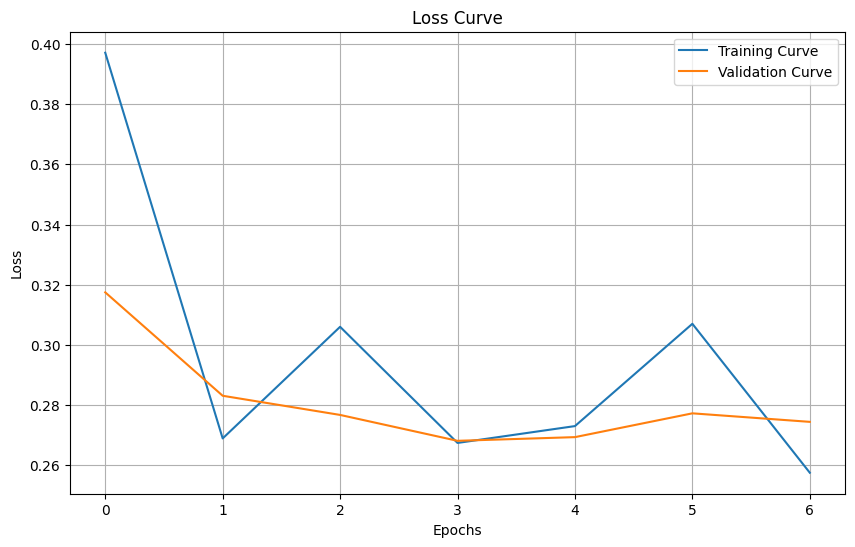

In [ ]:
import matplotlib.pyplot as plt

# Loss values for each epoch
loss_values_1 = [0.3971, 0.2689, 0.306, 0.2674, 0.273, 0.307, 0.2575]
loss_values_2 = [0.31745263934135437, 0.2830806076526642, 0.2767103910446167, 0.26810380816459656, 0.2693288326263428, 0.277240127325058, 0.27440813183784485]

# Plotting the loss curve
plt.figure(figsize=(10, 6))
plt.plot(loss_values_1, label='Training Curve')
plt.plot(loss_values_2, label='Validation Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from transformers import pipeline

checkpoint = "/content/flan-t5-finetuned-ner/checkpoint-4424"
token_classifier = pipeline(
    "token-classification", model=checkpoint ,aggregation_strategy="simple"
)

token_classifier("malabar spices vintage articles curios girly fashion wear and what not")

In [ ]:
test_df=pd.read_csv('/content/new_final_test_data_with_null.csv')

In [ ]:
def generate_labels(sentence, entities):
    words = sentence.split()
    labels = ['O'] * len(words)

    # Create a list of start positions for each word
    word_positions = []
    start_pos = 0
    for word in words:
        end_pos = start_pos + len(word)
        word_positions.append((start_pos, end_pos))
        start_pos = end_pos + 1  # +1 to account for the space

    for entity in entities:
        entity_start, entity_end = entity['start'], entity['end']
        entity_group = entity['entity_group']

        for i, (start_pos, end_pos) in enumerate(word_positions):
            if start_pos < entity_end and end_pos > entity_start:  # Check for overlap
                if entity_group == 'B' or labels[i] == 'O':  # Avoid overwriting 'B' with 'I'
                    labels[i] = entity_group

    return labels

final_labels_list=[]
# Example sentence and entities
for i in test_df['Sentences']:
  x=token_classifier(i)
  final_labels_list.append(generate_labels(i,x))

#sentence = 'malabar spices vintage articles curios girly fashion wear and what not'
'''entities = [
    {'entity_group': 'I', 'score': 0.9996081, 'word': 'mal', 'start': 0, 'end': 3},
    {'entity_group': 'I', 'score': 0.932553, 'word': 'ices', 'start': 10, 'end': 14},
    {'entity_group': 'B', 'score': 0.72800434, 'word': 'vintage', 'start': 14, 'end': 22},
    {'entity_group': 'B', 'score': 0.98976326, 'word': 'curios gir', 'start': 31, 'end': 42},
    {'entity_group': 'I', 'score': 0.99018365, 'word': 'fashion wear', 'start': 44, 'end': 57}
]

# Generate labels for the sentence
labels = generate_labels(sentence, entities)
print(labels)
'''


In [ ]:
df=pd.DataFrame()
df['Sentences']=test_df['Sentences']
df['Predictions']=final_labels_list
df['Labels']=test_df['Labels']
df.to_csv('predictions_flant5_finetune.csv')

In [ ]:
df=pd.read_csv('/content/predictions_flant5_finetune.csv')
for i in range(len(y_pred)):
  if len(eval(df['Labels'][i]))!=len(eval(df['Predictions'][i])):
    print(i)
    print((df['Labels'][i]))
    print((eval(df['Predictions'][i])))

In [ ]:
for i in range(len(df['Labels'])):
  x=token_classifier(df['Sentences'][i])
  if (eval(df['Predictions'][i]).count('B') + eval(df['Predictions'][i]).count('I')) != len(x):
    print(i+2)
    print(df['Sentences'][i])
    print(df['Predictions'][i])
    print(x)


In [ ]:
for i in range(len(df['Labels'])):
  x=token_classifier(df['Sentences'][i])
  if set(eval(df['Predictions'][i]))=={'O'} and len(x)>0:
    print(i+2)
    print(df['Sentences'][i])
    print(df['Predictions'][i])
    print(x)

In [ ]:
lst=[]
for i in df['Labels']:
  lst.append(eval(i))

y_true_flat = [label for sublist in lst for label in sublist]
y_pred_flat = [label for sublist in final_labels_list for label in sublist]

accuracy = accuracy_score(y_true_flat, y_pred_flat)

report = classification_report(y_true_flat, y_pred_flat)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

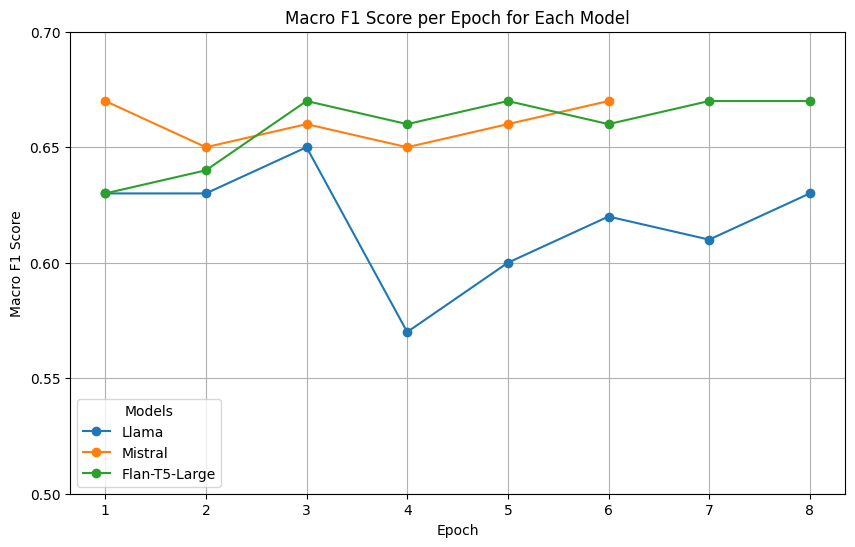

In [ ]:
import matplotlib.pyplot as plt

# F1 Score data for each model
llama_f1_scores = [0.63, 0.63, 0.65, 0.57, 0.60, 0.62, 0.61, 0.63]
mistral_f1_scores = [0.67, 0.65, 0.66, 0.65, 0.66, 0.67]
flan_t5_f1_scores = [0.63, 0.64, 0.67, 0.66, 0.67, 0.66, 0.67, 0.67]

# Epochs for each model
epochs_llama = list(range(1, 9))
epochs_mistral = list(range(1, 7))
epochs_flan_t5 = list(range(1, 9))

# Plotting F1 Scores per epoch for each model
plt.figure(figsize=(10, 6))

plt.plot(epochs_llama, llama_f1_scores, label='Llama', marker='o')
plt.plot(epochs_mistral, mistral_f1_scores, label='Mistral', marker='o')
plt.plot(epochs_flan_t5, flan_t5_f1_scores, label='Flan-T5-Large', marker='o')

plt.title('Macro F1 Score per Epoch for Each Model')
plt.xlabel('Epoch')
plt.ylabel('Macro F1 Score')
plt.ylim(0.5, 0.7)
plt.legend(title='Models')
plt.grid(True)
plt.xticks(epochs_llama)
plt.yticks([0.5, 0.55, 0.6, 0.65, 0.7])

plt.show()
